In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [2]:
df= pd.read_csv('ratings_Electronics.csv', names=['userId', 'productId','rating','timestamp'])

In [3]:
df.shape

(7824482, 4)

In [4]:
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

# Data set is huge taking random 20% of sample data

In [5]:
electronics_data=df.sample(n=1564896,ignore_index=True)

In [6]:
#after taking sample data, drop df to free the memory occupied by entire dataframe
del df

In [7]:
electronics_data.head()

,userId,productId,rating,timestamp
0,A1Z3DZYBKUVJZ6,B00F4A8FQM,4.0,1401840000
1,A3RSUNV4S5AEXT,B002L6HE9G,2.0,1349222400
2,A3GEBOTSI9N65,B005OFFH5Y,4.0,1378339200
3,AM2NJ7CSXQWP3,B002JPITXY,5.0,1286236800
4,A37F835I88ZZXF,B009X3UW2G,5.0,1367625600


In [8]:
#print the concise information of the dataset
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


# Droping column 'timestamp' coz, it has no use in prediction

In [9]:
if 'timestamp' in electronics_data.columns:
    electronics_data.drop('timestamp', axis=1, inplace=True)
else:
    print("Column 'timestamp' does not exist.")

In [10]:
electronics_data.describe()

,rating
count,1.564896e+06
mean,4.012140e+00
std,1.380183e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


As we can see minimum rating of the products is 1 , maximum rating is 5 and average rating of the products is around 4

In [11]:
#handle missing values
electronics_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [12]:
#handling duplicate records
electronics_data[electronics_data.duplicated()].shape[0]

0

In [13]:
electronics_data.head()

,userId,productId,rating
0,A1Z3DZYBKUVJZ6,B00F4A8FQM,4.0
1,A3RSUNV4S5AEXT,B002L6HE9G,2.0
2,A3GEBOTSI9N65,B005OFFH5Y,4.0
3,AM2NJ7CSXQWP3,B002JPITXY,5.0
4,A37F835I88ZZXF,B009X3UW2G,5.0


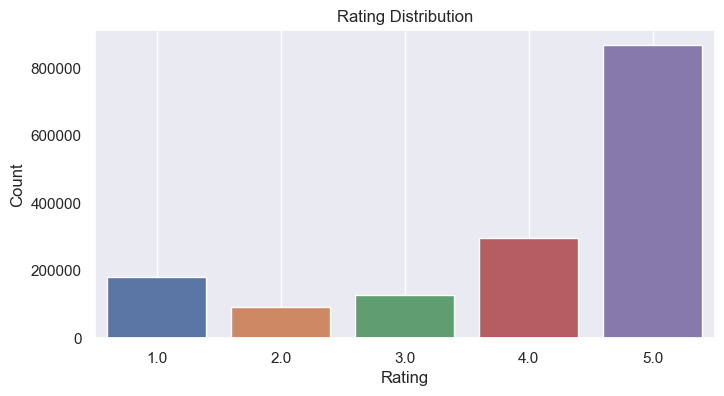

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating',data=electronics_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

most of the user have given 5 rating

In [15]:
print('Total rating : ',electronics_data.shape[0])
print('Total unique users : ',electronics_data['userId'].unique().shape[0])
print('Total unique products : ',electronics_data['productId'].unique().shape[0])

Total rating :  1564896
Total unique users :  1225729
Total unique products :  237435


analyzing the rating by user

In [16]:
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     108
A3OXHLG6DIBRW8    107
ADLVFFE4VBT8      106
A6FIAB28IS79       97
A680RUE1FDO8B      88
Name: rating, dtype: int64

In [17]:
print('No of rated product more than 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 50)))

No of rated product more than 50 per user : 29 


# Popularity Based Recommendation

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now

In [18]:
data=electronics_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [19]:
data.head()

,userId,productId,rating
0,A1Z3DZYBKUVJZ6,B00F4A8FQM,4.0
1,A3RSUNV4S5AEXT,B002L6HE9G,2.0
2,A3GEBOTSI9N65,B005OFFH5Y,4.0
3,AM2NJ7CSXQWP3,B002JPITXY,5.0
4,A37F835I88ZZXF,B009X3UW2G,5.0


In [20]:
no_of_rating_per_product=data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [21]:
no_of_rating_per_product.head()

productId
B0074BW614    3585
B00DR0PDNE    3260
B007WTAJTO    2876
B006GWO5WK    2452
B0019EHU8G    2448
Name: rating, dtype: int64

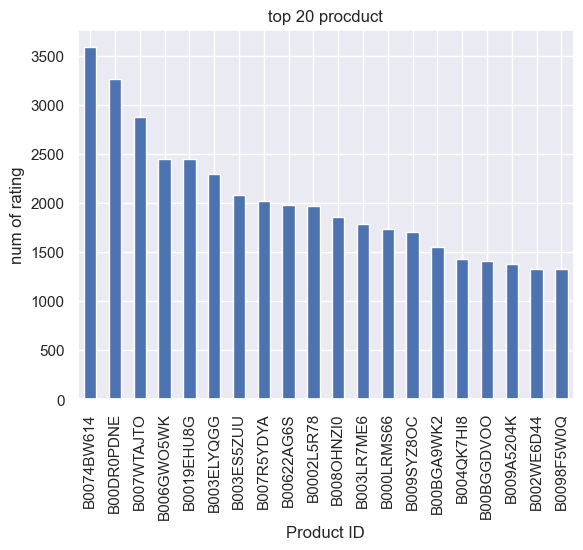

In [22]:
#top 20 product
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('num of rating')
plt.title('top 20 procduct')
plt.show()

In [23]:
#average rating product
mean_rating_product_count=pd.DataFrame(data.groupby('productId')['rating'].mean())

In [24]:
mean_rating_product_count.head()

,rating
productId,
0972683275,4.497797
1400532655,3.962963
140053271X,3.747126
B00000DM9W,4.548387
B00000J061,4.129630


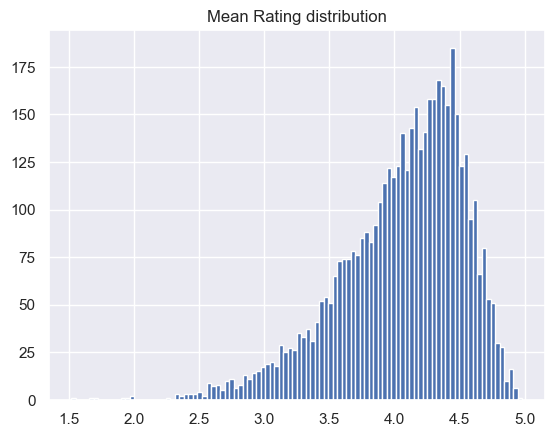

In [25]:
#plot the rating distribution of average rating product
plt.hist(mean_rating_product_count['rating'],bins=100)
plt.title('Mean Rating distribution')
plt.show()

In [26]:
#check the skewness of the mean rating data
mean_rating_product_count['rating'].skew()

-0.9124924488204319

it is highly negative skewed

In [27]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())

In [28]:
mean_rating_product_count.head()

,rating,rating_counts
productId,,
0972683275,4.497797,227
1400532655,3.962963,108
140053271X,3.747126,87
B00000DM9W,4.548387,62
B00000J061,4.129630,54


In [29]:
#highest mean rating product
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.467782,3585


In [30]:
#min mean rating product
print('min average rating product : ',mean_rating_product_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

min average rating product :  50
total min average rating products :  128


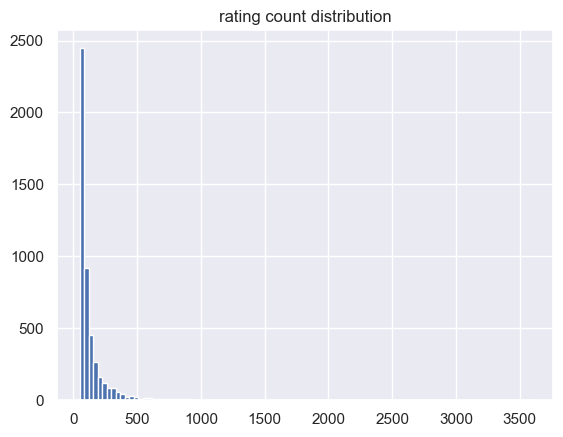

In [31]:
#plot the rating count of mean_rating_product_count
plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

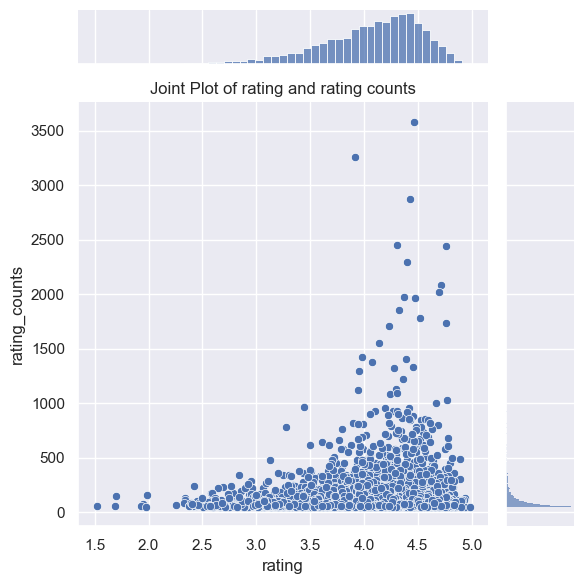

In [32]:
#joint plot of rating and rating counts
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_product_count)
plt.title('Joint Plot of rating and rating counts')
plt.tight_layout()
plt.show()

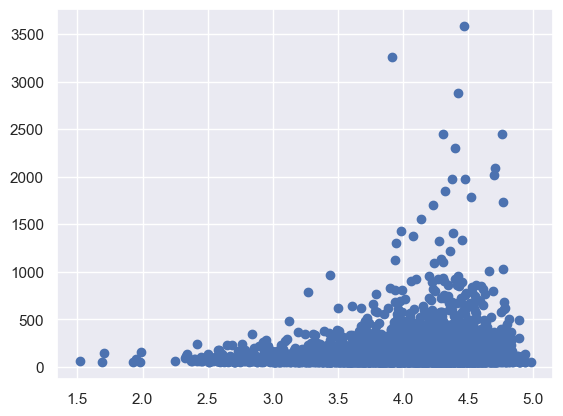

In [33]:
plt.scatter(x=mean_rating_product_count['rating'],y=mean_rating_product_count['rating_counts'])
plt.show()

In [34]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Counts is : 0.11341994593015134 


# Collaberative filtering (Item-Item recommedation)

Collaborative filtering is commonly used for recommender systems

In [37]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [38]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data,reader)

In [39]:
#Splitting surprise the dataset into 80,20 ratio using train_test_split
trainset, testset = train_test_split(surprise_data, test_size=0.3,random_state=42)

In [40]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [41]:
#make prediction using testset
test_pred=algo.test(testset)

In [42]:
#print RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred ,verbose=True)

Item-based Model : Test Set
RMSE: 1.3045


1.3045193794015988

# Model-based collaborative filtering system

These methods are based on machine learning and data mining techniques

In [43]:
data2=data.sample(20000)
ratings_matrix = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400532655,140053271X,B00000DM9W,B00000J061,B00000J1V5,B00000JDF5,B00000JI4F,B00000K135,B00000K2YR,...,B00I2VIR2M,B00I2ZBD1U,B00I94IPTW,B00I9K3ZQ4,B00IDG3IDO,B00IF70QCW,B00IGISO9C,B00INNP5VU,B00IO1V33U,B00IVPU786
userId,,,,,,,,,,,,,,,,,,,,,
A01682761RQSOIBP1TBDQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0315967143HDB8UXWN72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0611551KU79JNSC7JJV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A06174592MTVZB543AWIL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A07214112JYAGD73ZLP66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#check the shape of the rating_matrix
ratings_matrix.shape

(19874, 4374)

In [45]:
#transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A01682761RQSOIBP1TBDQ,A0315967143HDB8UXWN72,A0611551KU79JNSC7JJV,A06174592MTVZB543AWIL,A07214112JYAGD73ZLP66,A07711673FJ9VZJW7JGDG,A0791524DCIZVYY8L45Y,A0803614U3XOWRAUWKV4,A08696792UO12KEF85A77,A08871831JFLDQ8W8RJ8Y,...,AZXF2TE7DYEZL,AZXI3IO31YIE6,AZXUG1ZIWI9Q7,AZY2BZO67897H,AZY5WADV3UWQU,AZYI439ZVBO6J,AZYUW427M590I,AZZNCDET9KBTO,AZZSGHRZ7MMXP,AZZUIE66HZNY1
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400532655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140053271X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000DM9W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000J061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
x_ratings_matrix.shape

(4374, 19874)

In [47]:
#Decomposition of the matrix using Singular Value Decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(4374, 10)

In [48]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(4374, 4374)

In [49]:
x_ratings_matrix.index[10]

'B00001P4XA'

In [50]:
i="B00001P4ZH"
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)

12


In [51]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(4374,)

In [52]:
correlation_matrix[correlation_product_ID>0.75].shape

(356, 4374)

In [53]:
#Recommending top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['B00001P4ZH',
 'B00001P4ZR',
 'B00004Z5D1',
 'B00004ZCKV',
 'B000058BCQ',
 'B00006HOLO',
 'B00007056H',
 'B000075UZ7',
 'B00009V332',
 'B0000AI0N1',
 'B0000AZK0D',
 'B0000BZOGJ',
 'B0000VYJRY',
 'B0001A3N6C',
 'B0001MQSB2',
 'B0001VWHH2',
 'B0001Y7UAI',
 'B000204SWE',
 'B00028ONIA',
 'B00028VKLI']